# Variable transformers : BoxCoxTransformer

The BoxCoxTransformer() applies the BoxCox transformation to numerical
variables.

The Box-Cox transformation is defined as:

- T(Y)=(Y exp(λ)−1)/λ if λ!=0
- log(Y) otherwise

where Y is the response variable and λ is the transformation parameter. λ varies,
typically from -5 to 5. In the transformation, all values of λ are considered and
the optimal value for a given variable is selected.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.transformation import BoxCoxTransformer

In [2]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [3]:
# let's transform 2 variables

bct = BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])

# find the optimal lambdas 
bct.fit(X_train)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [4]:
# these are the exponents for the BoxCox transformation

bct.lambda_dict_

{'LotArea': 0.030946319160059473, 'GrLivArea': 0.0063048754214094106}

In [5]:
# transfor the variables

train_t = bct.transform(X_train)
test_t = bct.transform(X_test)

Text(0.5, 0, 'GrLivArea')

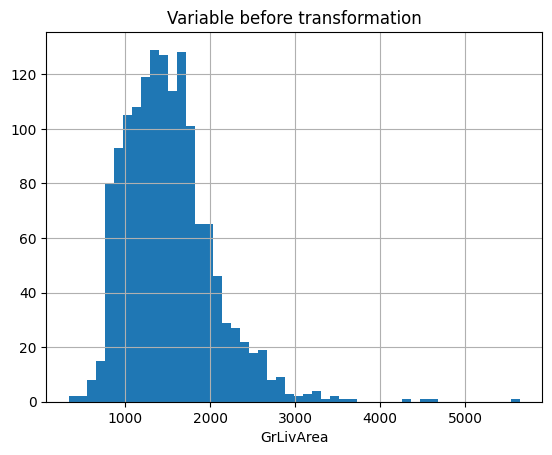

In [6]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

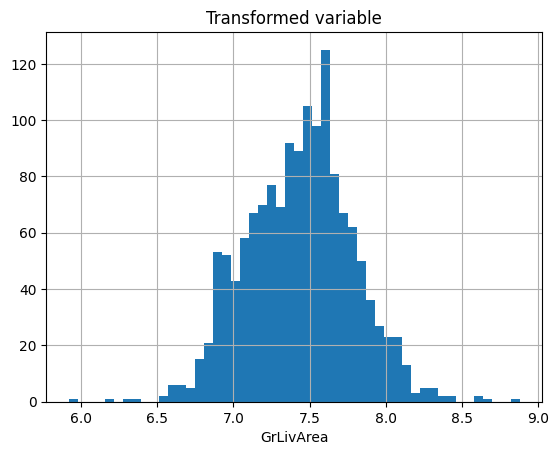

In [7]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

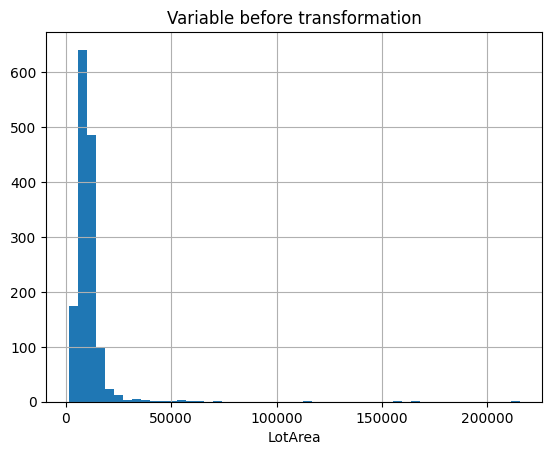

In [8]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

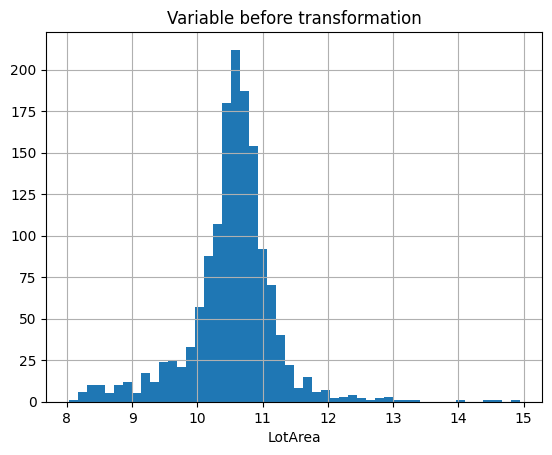

In [9]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

## Automatically select numerical variables

The transformer will transform all numerical variables if no variables are specified.

In [10]:
# load numerical variables only

variables = ['LotFrontage', 'LotArea',
             '1stFlrSF', 'GrLivArea',
             'TotRmsAbvGrd', 'SalePrice']

In [11]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [12]:
# Impute missing values

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

# impute variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [13]:
numeric_columns = train_t.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [14]:
train_numeric = train_t[numeric_columns].copy()

In [15]:
for column in numeric_columns:
    min_val = train_numeric[column].min()
    if min_val <= 0:
        print(f"{column}: minimum value = {min_val}")
        shift = abs(min_val) + 1
        train_numeric[column] = train_numeric[column] + shift


MasVnrArea: minimum value = 0.0
BsmtFinSF1: minimum value = 0
BsmtFinSF2: minimum value = 0
BsmtUnfSF: minimum value = 0
TotalBsmtSF: minimum value = 0
2ndFlrSF: minimum value = 0
LowQualFinSF: minimum value = 0
BsmtFullBath: minimum value = 0
BsmtHalfBath: minimum value = 0
FullBath: minimum value = 0
HalfBath: minimum value = 0
BedroomAbvGr: minimum value = 0
KitchenAbvGr: minimum value = 0
Fireplaces: minimum value = 0
GarageCars: minimum value = 0
GarageArea: minimum value = 0
WoodDeckSF: minimum value = 0
OpenPorchSF: minimum value = 0
EnclosedPorch: minimum value = 0
3SsnPorch: minimum value = 0
ScreenPorch: minimum value = 0
PoolArea: minimum value = 0
MiscVal: minimum value = 0


In [16]:
train_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.978082,10516.828082,6.099315,5.575342,1971.267808,1984.865753,104.128082,444.639726,47.549315,...,473.980137,95.244521,47.660274,22.954110,4.409589,16.060959,3.758904,44.489041,6.321918,2007.815753
std,42.300571,34.077576,9981.264932,1.382997,1.112799,30.202904,20.645407,180.725177,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,2.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2006.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,1.000000,...,335.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2007.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1.000000,384.500000,1.000000,...,481.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,713.250000,1.000000,...,577.000000,169.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1601.000000,5645.000000,1475.000000,...,1419.000000,858.000000,548.000000,553.000000,509.000000,481.000000,739.000000,15501.000000,12.000000,2010.000000


In [17]:
# Check for extremely large values
for col in train_numeric.columns:
    q75 = train_numeric[col].quantile(0.75)
    q25 = train_numeric[col].quantile(0.25)
    iqr = q75 - q25
    upper_bound = q75 + 1.5 * iqr
    
    if train_numeric[col].max() > upper_bound:
        print(f"\n{col}:")
        print(f"Max value: {train_numeric[col].max()}")
        print(f"Upper bound: {upper_bound}")


MSSubClass:
Max value: 190
Upper bound: 145.0

LotFrontage:
Max value: 313.0
Upper bound: 134.5

LotArea:
Max value: 215245
Upper bound: 17673.5

OverallCond:
Max value: 9
Upper bound: 7.5

MasVnrArea:
Max value: 1601.0
Upper bound: 411.625

BsmtFinSF1:
Max value: 5645
Upper bound: 1781.625

BsmtFinSF2:
Max value: 1475
Upper bound: 1.0

BsmtUnfSF:
Max value: 2337
Upper bound: 1686.5

TotalBsmtSF:
Max value: 6111
Upper bound: 2053.0

1stFlrSF:
Max value: 4692
Upper bound: 2155.125

2ndFlrSF:
Max value: 2066
Upper bound: 1821.0

LowQualFinSF:
Max value: 573
Upper bound: 1.0

GrLivArea:
Max value: 5642
Upper bound: 2747.625

BsmtFullBath:
Max value: 4
Upper bound: 3.5

BsmtHalfBath:
Max value: 3
Upper bound: 1.0

BedroomAbvGr:
Max value: 9
Upper bound: 5.5

KitchenAbvGr:
Max value: 4
Upper bound: 2.0

TotRmsAbvGrd:
Max value: 14
Upper bound: 10.0

Fireplaces:
Max value: 4
Upper bound: 3.5

GarageCars:
Max value: 5
Upper bound: 4.5

GarageArea:
Max value: 1419
Upper bound: 939.25

WoodDec

In [18]:
"""

from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer

# # ---------------- Fix 1 ---------------- 
# # Remove columns with low variation
# problematic_cols = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
#                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
# train_numeric_filtered = train_numeric.drop(columns=problematic_cols)

# # Apply Winsorizer
# winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
# train_winsorized = winsor.fit_transform(train_numeric_filtered)

# # ---------------- Fix 2 ---------------- 
# # Using percentiles instead of IQR
# winsor = Winsorizer(capping_method='gaussian', tail='both', fold=0.05)  # 5th and 95th percentiles
# train_winsorized = winsor.fit_transform(train_numeric)

# ---------------- Fix 3 ---------------- 
# First, process columns with sufficient variation
problematic_cols = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
good_cols = [col for col in train_numeric.columns if col not in problematic_cols]
train_good = train_numeric[good_cols]

# Apply Winsorizer to good columns
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
train_winsorized_good = winsor.fit_transform(train_good)

# Add back the problematic columns without winsorizing
train_winsorized = pd.concat([train_winsorized_good, train_numeric[problematic_cols]], axis=1)

# ---------------- End All Fix ---------------- 

# Then apply YeoJohnson transformation (which handles both positive and negative values)
yjt = YeoJohnsonTransformer()
train_transformed = yjt.fit_transform(train_winsorized)

# Check the results
print("\nSkewness before transformation:")
print(train_numeric.skew())
print("\nSkewness after transformation:")
print(train_transformed.skew())

"""

'\n\nfrom feature_engine.transformation import YeoJohnsonTransformer\nfrom feature_engine.outliers import Winsorizer\n\n# # ---------------- Fix 1 ---------------- \n# # Remove columns with low variation\n# problematic_cols = [\'BsmtFinSF2\', \'LowQualFinSF\', \'BsmtHalfBath\', \'KitchenAbvGr\', \n#                     \'EnclosedPorch\', \'3SsnPorch\', \'ScreenPorch\', \'PoolArea\', \'MiscVal\']\n# train_numeric_filtered = train_numeric.drop(columns=problematic_cols)\n\n# # Apply Winsorizer\n# winsor = Winsorizer(capping_method=\'iqr\', tail=\'both\', fold=1.5)\n# train_winsorized = winsor.fit_transform(train_numeric_filtered)\n\n# # ---------------- Fix 2 ---------------- \n# # Using percentiles instead of IQR\n# winsor = Winsorizer(capping_method=\'gaussian\', tail=\'both\', fold=0.05)  # 5th and 95th percentiles\n# train_winsorized = winsor.fit_transform(train_numeric)\n\n# ---------------- Fix 3 ---------------- \n# First, process columns with sufficient variation\nproblematic_cols

In [19]:
# let's transform all numerical variables
bct = BoxCoxTransformer()

# bct.fit(train_t)
bct.fit(train_numeric)

BoxCoxTransformer()

In [20]:
# variables that will be transformed

bct.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [21]:
# # transform  variables

# -- Error
# train_t = bct.transform(train_t)
# test_t = bct.transform(test_t)

# -- Error
# train_t[numeric_columns] = bct.transform(train_numeric)
# test_t[numeric_columns] = bct.transform(test_numeric)

from feature_engine.transformation import YeoJohnsonTransformer

test_numeric = test_t[numeric_columns].copy()
yjt = YeoJohnsonTransformer()
yjt.fit(train_numeric)

train_t[numeric_columns] = yjt.transform(train_numeric)
test_t[numeric_columns] = yjt.transform(test_numeric)

In [22]:
# learned parameters

bct.lambda_dict_

{'MSSubClass': -0.21084066946842672,
 'LotFrontage': 0.7719131544135887,
 'LotArea': 0.030946319160059473,
 'OverallQual': 0.7622456201067842,
 'OverallCond': 0.4139122549254795,
 'YearBuilt': 22.11656026483541,
 'YearRemodAdd': 40.56818556230323,
 'MasVnrArea': -0.24223220900252893,
 'BsmtFinSF1': 0.22872561013922998,
 'BsmtFinSF2': -1.5215505710444592,
 'BsmtUnfSF': 0.47127231212980564,
 'TotalBsmtSF': 0.7396016878491307,
 '1stFlrSF': -0.07883215666753164,
 '2ndFlrSF': -0.12741730079158473,
 'LowQualFinSF': -10.018636882746724,
 'GrLivArea': 0.0063048754214094106,
 'BsmtFullBath': -1.5451806419610792,
 'BsmtHalfBath': -25.325668308177693,
 'FullBath': 0.7664542854246292,
 'HalfBath': -2.237858799874672,
 'BedroomAbvGr': 0.9317009442813491,
 'KitchenAbvGr': -1.855260753883089,
 'TotRmsAbvGrd': 0.21807491289576028,
 'Fireplaces': -0.3880997798015053,
 'GarageYrBlt': 2.564557177197898,
 'GarageCars': 1.34562204746063,
 'GarageArea': 0.8112580606617364,
 'WoodDeckSF': -0.0785961051874299